In [13]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt

In [17]:
df=pd.read_csv(r"R:\programs\bhp.csv")
df.head()
print(df.shape)

(13200, 7)


In [5]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

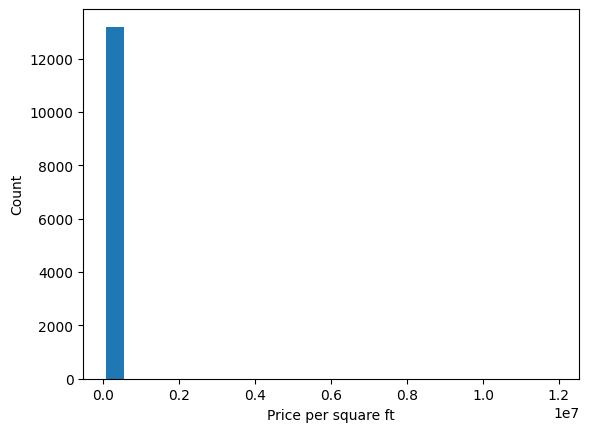

In [14]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

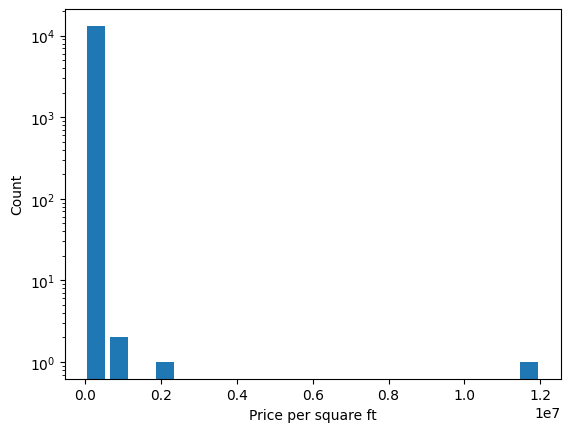

In [15]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [7]:
minthresold,maxthresold=df.price_per_sqft.quantile([0.01,0.999])
minthresold,maxthresold

(2549.0, 50959.36200000098)

In [16]:
# df_percentile = df[(df['price_per_sqft'] > lower_bound) & (df['price_per_sqft'] < upper_bound)]
outliers=df[(df['price_per_sqft'] > minthresold) & (df['price_per_sqft'] < maxthresold)]
outliers.sample(7)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10390,Bommasandra Industrial Area,3 BHK,1491.00,3.0,40.50,3,2716
11920,Hennur Road,2 BHK,980.00,2.0,51.00,2,5204
9497,Whitefield,2 BHK,1195.00,2.0,61.36,2,5134
6786,Ardendale,3 BHK,1777.26,3.0,105.00,3,5907
9521,Hebbal,2 BHK,1200.00,2.0,48.00,2,4000
11317,Yelahanka,3 BHK,1350.00,2.0,85.00,3,6296
12767,Sompura,4 BHK,2150.00,3.0,85.00,4,3953


In [19]:
df2 = df[(df.price_per_sqft<maxthresold) & (df.price_per_sqft>minthresold)]
df2.shape

(13050, 7)

In [20]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23258.82472991129, -9849.944576654585)

In [21]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6109,HRBR Layout,6 Bedroom,1000.0,6.0,275.0,6,27500
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
2825,HBR Layout,9 Bedroom,1200.0,6.0,280.0,9,23333
6864,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961
2258,other,4 Bedroom,3200.0,4.0,1200.0,4,37500
4357,other,4 Bedroom,3250.0,5.0,850.0,4,26153
9229,1st Phase JP Nagar,4 Bedroom,1200.0,4.0,300.0,4,25000
9360,HAL 2nd Stage,4 Bedroom,2280.0,4.0,615.0,4,26973
4555,Judicial Layout,6 Bedroom,1200.0,6.0,300.0,6,25000
10972,other,4 BHK,8321.0,5.0,2912.0,4,34995


In [22]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(12925, 7)

In [23]:
df2.shape[0]-df3.shape[0]

125

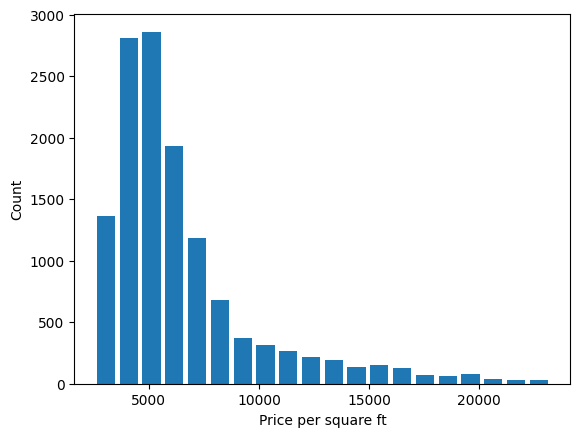

In [24]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

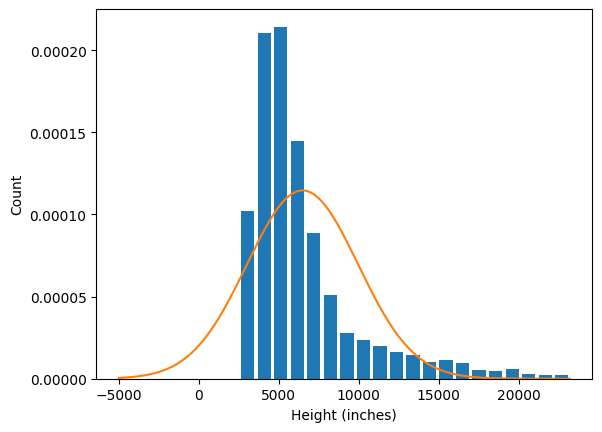

In [25]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [26]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6432\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
8844,Yelachenahalli,2 BHK,1110.0,2.0,110.00,2,9909,0.774311
1999,Yeshwanthpur,1 BHK,671.0,1.0,36.85,1,5491,-0.293201
6543,Whitefield,2 BHK,1100.0,2.0,37.00,2,3363,-0.807385
4807,Green Glen Layout,3 BHK,1751.0,2.0,115.00,3,6567,-0.033209
5035,Seegehalli,4 BHK,2800.0,4.0,140.00,4,5000,-0.411840
11843,Thanisandra,3 BHK,1930.0,4.0,122.00,3,6321,-0.092650
8901,Electronic City,2 BHK,1165.0,2.0,33.64,2,2887,-0.922400
6241,Mahadevpura,3 BHK,1620.0,2.0,76.00,3,4691,-0.486503
7929,other,3 BHK,1768.0,3.0,95.00,3,5373,-0.321713
476,Basavangudi,4 Bedroom,1125.0,4.0,180.00,4,16000,2.246066


In [27]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [29]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(12925, 8)

In [30]:
df2.shape[0] - df4.shape[0]

125